   #      Assignment 2 Linear Predictive Analysis
   

 ## Name: Tanveer Sharma
 ## Roll Number : 22M1062

### Libraries Used

In [90]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
from scipy.signal import tf2zpk
from scipy.io.wavfile import*
import math
import cmath
import matplotlib.pyplot as plt
import IPython

### Reading and Playing Data File aa.wav

In [91]:
sr,x_n = read('aa.wav')
IPython.display.Audio("aa.wav")

### Applying Pre Emphasis

We are passing our $aa$ sound signal through pre emphasis Filter 

$H(z)={1-0.95z^-1}$ which can be written in difference equation as :
  $y[n]=-0.95x[n-1]+x[n]$
 
Here I have taken $x[n]$ as original signal and $y[n]$ as preemphasized signal

In [92]:
y_n = np.zeros(x_n.shape)
y_n[0] = x_n[0]
for i in range(1,x_n.shape[0]): 
    y_n[i] = x_n[i]-0.95*x_n[i-1]

### Comparing Original and Signal after Pre Emphasis 

By passing the $x[n]$ and $y[n]$ through a hamming window of 10 ms and plotting its magnitude spectrum.

Text(0.5, 1.0, 'Magnitude spectrum corresponding to hamming window of size 10 ms')

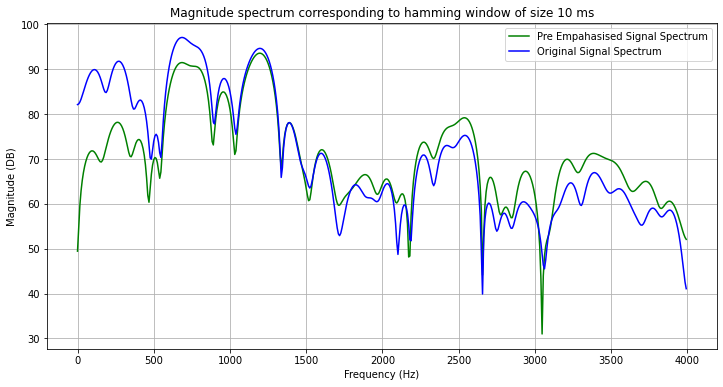

In [94]:
window_size = 0.01
Fs = sr
window_len = int(window_size*Fs)
window= np.hamming(window_len)
center = y_n.shape[0]//2 
V_n_y = y_n[center:center+window.shape[0]]* window
V_n_x = x_n[center:center+window.shape[0]]* window
dft_length = 1024
V_k_y = np.fft.fft(V_n_y, n=dft_length)
V_k_x = np.fft.fft(V_n_x, n=dft_length)
freq = np.fft.fftfreq(V_k_y.shape[-1], 1/Fs)
zerro = dft_length//2
mag_vk_y = 20*np.log10(np.abs(V_k_y))
mag_vk_x = 20*np.log10(np.abs(V_k_x))
plt.plot(freq[0:zerro],mag_vk_y[0:zerro],'g-',label = 'Pre Empahasised Signal Spectrum')
plt.plot(freq[0:zerro],mag_vk_x[0:zerro],'b-',label = 'Original Signal Spectrum')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = 12,6
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (DB)')
plt.title('Magnitude spectrum corresponding to hamming window of size 10 ms')

#### Observation
Here we can clearly observe that after pre-emphasis,signal's spectral tilt is boosted that is slantness is reduced which means that the lower frequency components have a relatively lower amplitude compared to the original signal and higher frequency components have relatively higher amplitude compared to original signal.

# Narrow Band Spectrum

Text(0.5, 1.0, 'Magnitude spectrum (Db) corresponding to Hamming window of size 30 ms')

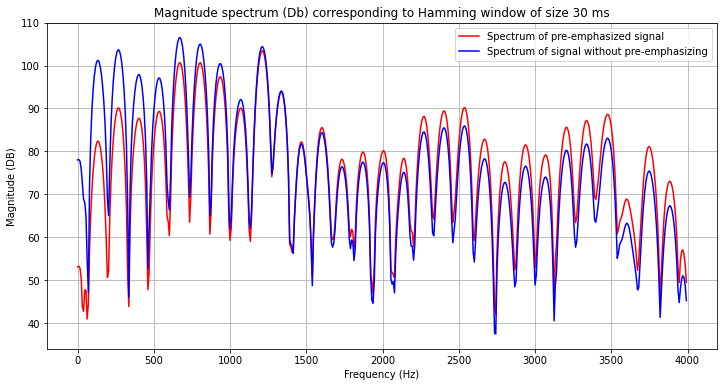

In [95]:
window_size = 0.03
Fs = sr
window_len = int(window_size*Fs)
window= np.hamming(window_len)
center = y_n.shape[0]//2 
aa_n_y = y_n[center:center+window.shape[0]]* window
aa_n_x = x_n[center:center+window.shape[0]]* window

dft_length = 1024

aa_k_y = np.fft.fft(aa_n_y, n=dft_length)
aa_k_x = np.fft.fft(aa_n_x, n=dft_length)

freq = np.fft.fftfreq(aa_k_y.shape[-1], 1/Fs)

zero = dft_length//2
mag_aa_k_y = 20*np.log10(np.abs(aa_k_y))
mag_aa_k_x = 20*np.log10(np.abs(aa_k_x))

plt.plot(freq[0:zero],mag_aa_k_y[0:zero],'r',label = 'Spectrum of pre-emphasized signal')
plt.plot(freq[0:zero],mag_aa_k_x[0:zero],'b',label = 'Spectrum of signal without pre-emphasizing')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = 20,6
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (DB)')

plt.title('Magnitude spectrum (Db) corresponding to Hamming window of size 30 ms')

#### Observation
- We can clearly observe that by passing the filter through a zero at location 0.95 we can remove the glottal shaping and radiation.
- We can also observe that as compared to original signal the spectrum of pre-emphasized signal is boosted and the magnitude at higher frequencies is increased.
- By doing the pre-emphasis of the signal we can enhance our all pole modelling with LP analyis as there are poles which are wasted for just capturing the glottal shaping and radiation. 

# Levinson- Durbin recursion

#### Defining Autocorrealation Function

The AutoCorrelation function is given by equation:
$r_{ss}[m]=\sum_{n=0}^{\infty} s[n] \cdot s[n+m]$

In [96]:
def autocorrelation(s): #Function to give p+1 autocorrelation coefficients.
  
  r = np.zeros(s.shape)
  p = s.shape[0]
  for m in range(0,p):
    for n in range(0,p):
      if n+m < s.shape[0]:
        r[m] = r[m] + s[n]*s[n+m]
  return(r)

Finding Levinson - Durbin recurrsion equations :
we have : $r_{ss}[i]=\sum_{k=0}^{p} a_k \cdot r_{ss}[i-k]$

Here, $P$ matrix contains integer values from 0 to '$p$' so that we can obtain the Error matrix with increasing '$p$'. $E^0$ corresponds to the Linear Predictor with $p=0$ and $E^p$ is the error for Linear Predictor with order '$p$'.

AutoCorrelation Cofficients
 For order P=2: 
 [ 0.93133242 -0.53925298]
 For order P=4: 
 [ 0.6871401  -0.28199187 -0.17275402 -0.2055609 ]
 For order P=6: 
 [ 0.71295025 -0.28421957 -0.1561982  -0.28847369  0.14255291 -0.06844695]
 For order P=8: 
 [ 0.58329635 -0.21400761 -0.16121663 -0.50834496 -0.03932595 -0.08073617
  0.21894354 -0.59313464]
 For order P=10: 
 [ 0.68824994 -0.19517577 -0.16816064 -0.49588686  0.06074323 -0.00194448
  0.27663989 -0.69143195  0.14488429  0.09026391]


Error for 2th order is: 328848869.4806324
Error for 4th order is: 281098907.0255732
Error for 6th order is: 277299545.0180218
Error for 8th order is: 172839853.8166176
Error for 10th order is: 163964169.3684186


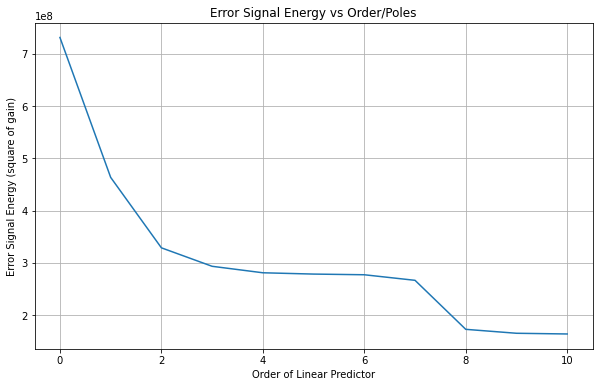

In [100]:
# Orders p
P = np.array([2,4,6,8,10])
# Errors
Errors = []
LP_cofficients = []
r = autocorrelation(aa_n_y)
for p in P:
  E = np.zeros(p)
  a = np.zeros(p)
  a_1 = np.zeros(p)
  E[0] = r[0]
  # Reflection Coefficient k:
  k = r[1]/E[0]
  a[0] = k
  if p==P[-1]:
    Errors.append(E[0])
    #recursion
  for i in range(1,p):
    a_1 = a.copy()
    E[i] = (1-np.square(k))*E[i-1]
    
    # Updating Reflection Coefficient
    k=0
    for j in range(i):
      k += a_1[j]*r[i-j]
    k = (r[i+1]- k)/ E[i]

    # Updating Coefficients
    a[i] = k
    for j in range(i):
      a[j] = a_1[j] - k*a_1[i-j-1]
    # Appending the errors:
    if (p==P[-1]):
      Errors.append(E[i])

  # Appending coefficients and Errors
  LP_cofficients.append(a)
  if (p==P[-1]):
      Errors.append((1-np.square(k))*E[i])
  
# Print Coefficient:
print('AutoCorrelation Cofficients')
for i in range(P.shape[0]):
  print(' For order P={}: \n {}'.format(P[i],LP_cofficients[i]))

plt.plot(np.arange(0,P[-1]+1,1), Errors)
plt.xlabel('Order of Linear Predictor')
plt.ylabel('Error Signal Energy (square of gain)')
plt.title('Error Signal Energy vs Order/Poles')
plt.rcParams["figure.figsize"] = 10,6
plt.grid()

print('\n')

for p in P:
  print('Error for {}th order is: {}'.format(p,Errors[p]))

#### Observation
we can clearly see that error is decreasing as the order P increases. However there isn't any significant improvement in error energy after a certain value of P (8-10in this case). 

# Pole-Zero Plots for p=6,10

 Transfer function can be given as $H(z)=\frac{G}{A(z)}$ where $A(z)$ is given by the following equation :
 
 $A(z)=1-\sum_{k=0}^{p} a_k \cdot z^{-k}$

we know that Transfer Function will not have any zeros, but only poles which are also the roots of the equation $A(z)=0$.

Poles of Order 6 [-0.5081035 +0.47296035j -0.5081035 -0.47296035j  0.63171256+0.62661186j
  0.63171256-0.62661186j  0.23286606+0.35382644j  0.23286606-0.35382644j]
Zeroes of Order 6 []
Poles of Order 10 [-0.82543402+0.43408586j -0.82543402-0.43408586j -0.31833756+0.88727156j
 -0.31833756-0.88727156j  0.55310096+0.79092801j  0.55310096-0.79092801j
  0.79773016+0.50948347j  0.79773016-0.50948347j  0.53547347+0.j
 -0.26134261+0.j        ]
Zeroes of Order 10 []


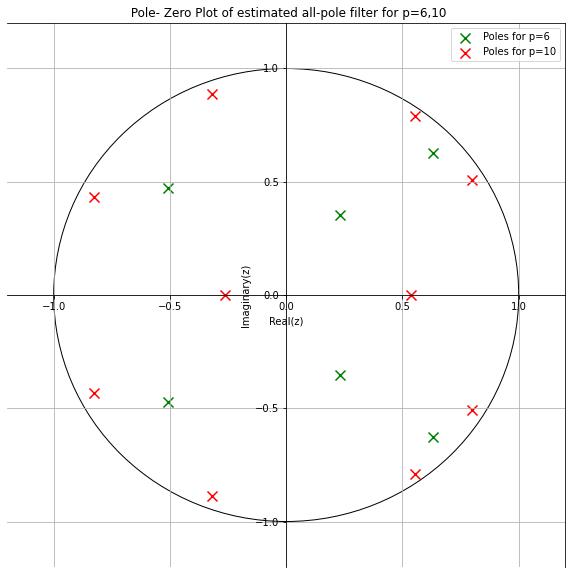

In [101]:
# For p=6
a_6 = LP_cofficients[2]
# For p=10
a_10 = LP_cofficients[4]

# tf2zpk: Gives zeros, poles and gain
Num_coef = 1
Den_coef = np.ones(a_6.shape[0]+1)
Den_coef[1:] = -a_6
zeros_6, poles_6, k_6 = tf2zpk(Num_coef, Den_coef)
print('Poles of Order 6',poles_6)
print('Zeroes of Order 6',zeros_6)
Den_coef = np.ones(a_10.shape[0]+1)
Den_coef[1:] = -a_10
zeros_10, poles_10, k_10 = tf2zpk(Num_coef, Den_coef)
print('Poles of Order 10',poles_10)
print('Zeroes of Order 10',zeros_10)
# Plotting Pole zero
# Plotting Unit Circle:
circle = plt.Circle((0,0),1,fill = False)
ax= plt.gca()
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.2, 1.2))
ax.add_patch(circle)
# Add Poles:
x = np.real(poles_6)
y = np.imag(poles_6)
plt.scatter(x,y,marker = 'x', color = 'g',s = 100, label = 'Poles for p=6')

x = np.real(poles_10)
y = np.imag(poles_10)
plt.scatter(x,y,marker = 'x', color = 'r',s = 100, label = 'Poles for p=10')

# Add Axis
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.rcParams["figure.figsize"] = 6,6
plt.xlabel('Real(z)')
plt.ylabel('Imaginary(z)')
plt.title(' Pole- Zero Plot of estimated all-pole filter for p=6,10')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
plt.legend()

#### Comment :
Above Pole zero plot of estimated all-pole filter for p=6 and 10 is shown. 
- p=6 with green cross and p=10 with red crosses. 
- For p = 6, we have 3 complex conjugate pole pair. 
- Similarly, for p= 10, we have 2 real poles and 4 complex conjugate pole pair.
- As we do not have any zero,it is not plotted.

# Linear Predictor Cofficients Spectrum Magnitude

We know that the gain is equal to the square root of minimum error signal energy that we have already calculated and found out:

-  for p = 2  G = 18134
-  for p = 4  G = 16766
-  for p = 6  G = 16652
-  for p = 8  G = 13146
-  for p = 10 G = 12804


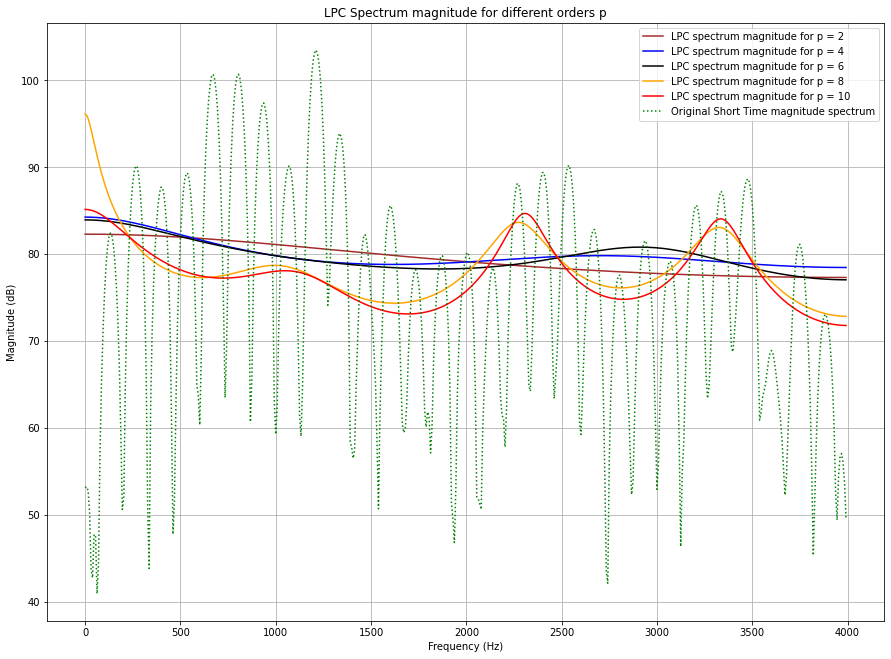

In [105]:
colors = {2: 'brown', 4: 'blue', 6: 'black', 8: 'orange', 10: 'red'}
index_E = np.zeros(6,int)
index_E[:5] = np.arange(2,11,2)
index_E[5] = P[-1]
Errors = np.array(Errors)
G = np.sqrt(Errors[index_E])
f = freq[0:zerro]
w = 2*np.pi*f/Fs
mag_orig = mag_aa_k_y[0:zerro]
z = np.exp(-1j*w)
magnitude_db_P = []
for i in range(P.shape[0]):
  poles = LP_cofficients[i]
  Den = 1
  for j in range(len(poles)):
    Den += poles[j]*z**j
  magnitude_db = 20*np.log10(np.abs(G[i]/Den))
  magnitude_db_P.append(magnitude_db)
  plt.plot(f,magnitude_db,colors[P[i]],label = 'LPC spectrum magnitude for p = {}'.format(P[i]))

plt.plot(f,mag_orig,'g:',label='Original Short Time magnitude spectrum' )
plt.legend()
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.title('LPC Spectrum magnitude for different orders p')
fig = plt.gcf()
fig.set_size_inches(15, 11)
plt.grid('on')

#### Observations :

The dotted plot indicates the Magnitude plot corresponding to STFT of the windowed and pre-emphasized signal using Hamming Window. 

Observations corresponding plots are for $p \hspace{1mm}  \epsilon \hspace{1mm}({2,4,6,8,10}$)
- For $p=2$, we know that only two poles are there in the transfer function thus majority details are not captured.

- As $p$ increases, the spectrum tends to capture more and more details of the audio signal.

- At peaks, the envelopes spectrums are always below the STFT Spectrum while at valleys, the envelopes are always above the STFT Spectrum. So we can say that the average error ratio throughout the plot remains constant.

- For $p=10$, the better plot is obtained. This plot is able to capture all the possible formant frequencies. The envelope is hugging the peaks of the original spectrum.

- Error is decreasing as the order is increasing because higher order LP Coefficients are trying to approach the original spectrum even by taking the harmonics into consideration. If we have a large enough order LP coefficients, it would be able to replicate the exact the original spectrum.

# Inverse Filtering to obtain residual error signal

From the given Equation 

$e[n] = s[n] -  \sum_{k=1}^{p} a_n s[n-k] $

We can make Linear predictor model of 10th order from which we will find the residual error signal by using inverse filtering by Difference Equation method.

Text(0.5, 1.0, 'Magnitude (dB) spectrum of residual error signal')

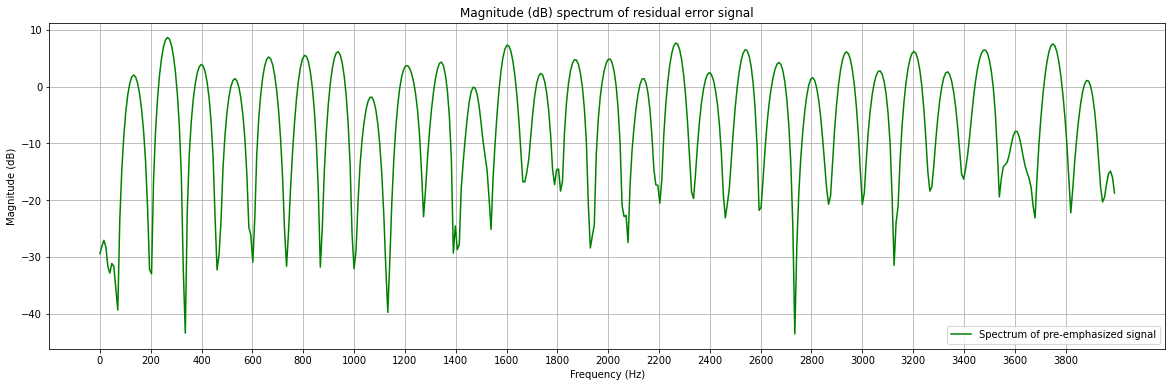

In [108]:
a_10 = LP_cofficients[4]
G_10 = np.sqrt(Errors[10])

s_n = aa_n_y
e = np.zeros(s_n.shape)

for n in range(s_n.shape[0]):
  e[n] = s_n[n]
  for k in range(1,11):
    if (n-k>0):
      e[n] -= a_10[k-1]*s_n[n-k]
e = e/G_10

E_k = np.fft.fft(e, n=dft_length)
# Frequency for plotting
freq = np.fft.fftfreq(E_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_length//2
mag_E_k = 20*np.log10(np.abs(E_k))
plt.plot(freq[0:zerro],mag_E_k[0:zerro],'g',label = 'Spectrum of pre-emphasized signal')
plt.legend()
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.rcParams["figure.figsize"] = 20,6
plt.xticks(np.arange(0, 4000, 200))
plt.title('Magnitude (dB) spectrum of residual error signal')

Estimated F0 using ACF: 133.33333333333334 Hz, 
 using magnitude Spectrum of error signal: 132.8125 Hz




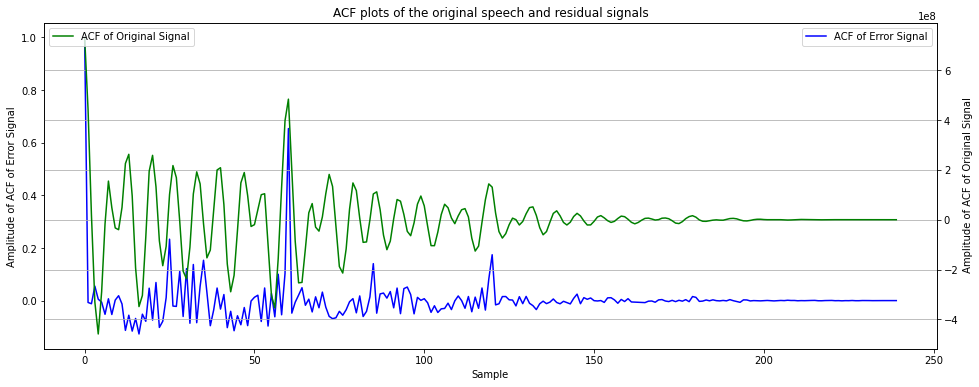

In [109]:
ax = plt.gca()
ax.plot(np.arange(e.shape[0]),autocorrelation(e),'b', label='ACF of Error Signal')

ax.set_xlabel('Sample')
ax.set_ylabel('Amplitude of ACF of Error Signal')
ax2=ax.twinx()

ax2.plot(np.arange(s_n.shape[0]),autocorrelation(s_n),'g', label = 'ACF of Original Signal')
ax2.set_ylabel(' Amplitude of ACF of Original Signal')
plt.grid('on')
ax.legend(loc=0)
ax2.legend(loc=2)
plt.title('ACF plots of the original speech and residual signals')
fig = plt.gcf()
fig.set_size_inches(16, 6)
print('Estimated F0 using ACF: {} Hz, \n using magnitude Spectrum of error signal: {} Hz\n\n'.format(1/((np.argmax(autocorrelation(e)[1:])+1)/Fs), freq[np.argmax(mag_E_k[:25])]))

### Observations
- To find the fundamental frequency from ACF plot of Residual error signal we have to find the peak of first peak after zero and calculated the time corresponding to that value. Then that time is fundamental time period and similarly fundamental frequency can be found by inverting the time period.
- By using ACF of error residual signal Pitch period is found to be at F0 = 133 Hz and this frequency is used further to reconstruct the original signal.
- If we observe the magnitude spectrum of error residual signal we can see that the formant shaping is almost removed.
- Only harmonics are remaining in the the magnitude spectrum of error signal.
- dB Magnitude is relatively less than original signal because we have divided the error signal with G to get a unit energy signal.
- Fundamental frequency F0 found using harmonics plot is 132 Hz.
- Now in ACF plot of error residual signal we can again see that the high values of ACF that occured due to Formant shaping is now reduced and peaks at harmonics locations is remaining.
- As the k increases values of r[k] is decreasing drastically as the autocorrelation between far values is very less unless they are harmonics. This property is used in Harmonic product spectrum (HPS) method to determine the Fundamental frequency F0.
- Again the difference in the magnitude of amplitude can be explained by the effect of dividing by G.
- If the sound were unvoiced instead of a voiced vowels, then we would not have seen the peaks in the ACF but all the values in error signal ACF would have been close to zero.



# LP Reconstruction/Resynthesis

### Ideal Impulse Train

To reconstruct the signal, first we generate impulse train corresponding to pitch $F_0 $ 

we can easily find that pitch of 133.33 Hz corresponds to period of 60 samples.

We start by defining a function to define the impulse train of specified period.
Finally, we plot the waveform for LP of p = 10 and p=8 after passing through de emphasis Filter.

$H(z)=\frac{1}{1-0.95z^-1}$ which can be written in difference equation as :
  $y[n]=0.95y[n-1]+x[n]$
  
Also we are taking easily taking pitch of 120 Hz corresponds to period of 66 samples.

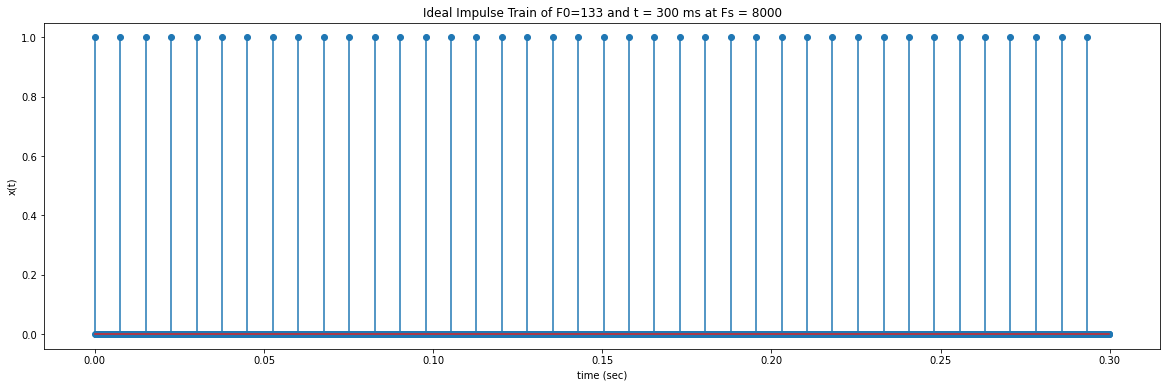

In [110]:

def I_train(Fs, F0, delta_t, sec):
  x_n = np.zeros(int(sec*Fs))
  st,N = stride(F0,Fs,delta_t)
  i=0
  while(i+N < x_n.shape[0]):
    x_n[i:i+N] = st
    i+=N
  if(i<x_n.shape[0]):
     x_n[i:] = st[:x_n.shape[0]-i]
  return x_n


from fractions import Fraction
def stride(F0, Fs, delta_t):
  T0 = 1/F0
  Ts = 1/Fs
 
  N = Fraction(Fs,F0).numerator
  st = np.zeros(N)
  n = np.arange(0,N)
  t = Ts * n
  k=0
  for i in t:
    c= i//T0
    j = i-c*T0
    if( j< delta_t/2):
      st[k] =1
    elif(j > (T0-delta_t/2)):
      st[k] = 1
    k = k+ 1
  return st, N

F0 = 133
Fs = 8000
# Finding the samples x[n] for 0.3 sec
x_n = np.zeros(int(0.3*Fs))
# delta_t = 1/Fs
x_n = I_train(Fs, F0, 1/Fs, 0.3)

n = np.arange(0,x_n.shape[0])
plot_x = n/Fs
plot_y = x_n
plt.stem(plot_x,plot_y)
plt.xlabel('time (sec)')
plt.ylabel('x(t)')
plt.title('Ideal Impulse Train of F0={} and t = {} ms at Fs = {}'.format(F0,300,Fs))
plt.show()


### Applying 8th order Filter

Text(0.5, 1.0, 'Reconstructed signal with F0=133, p=8')

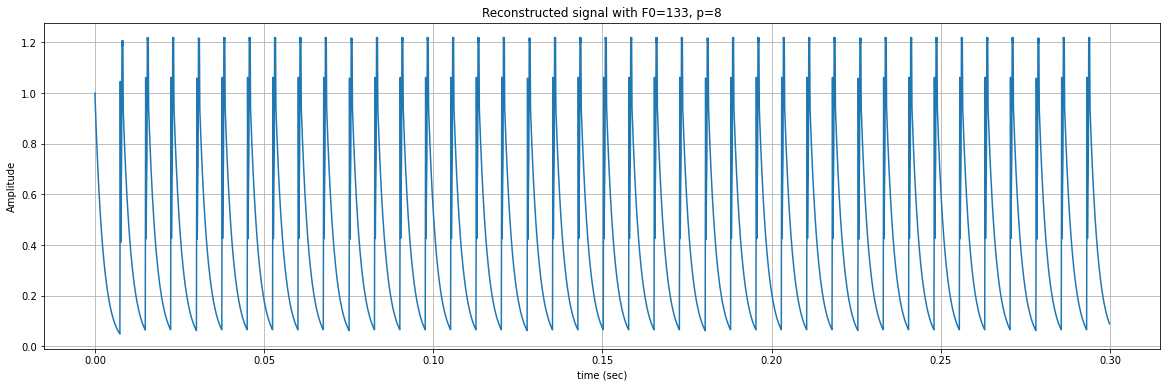

In [111]:
# Output with 8th order filter and G
a_8 = LP_cofficients[3]
G_8 = np.sqrt(Errors[8])

u_n = x_n
s_hat = np.zeros(u_n.shape)
E_x_n = np.sqrt(np.sum(x_n**2))

for n in range(u_n.shape[0]):
  s_hat[n] = u_n[n]
  for k in range(1,a_8.shape[0]):
    if (n-k>0):
      s_hat[n] -= a_8[k-1]*u_n[n-k]

# De-emphasis Difference Equation: 
s_hat_d = np.zeros(s_hat.shape)
s_hat_d[0] = s_hat[0]
for i in range(1,s_hat.shape[0]): 
  s_hat_d[i] = s_hat[i]+0.95*s_hat_d[i-1]

# View the waveform:
n = np.arange(s_hat.shape[0])/Fs
plt.plot(n, s_hat_d)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Reconstructed signal with F0={}, p={}'.format(F0,8))

In [112]:
scaled = np.int16(s_hat_d/s_hat.max() * 32767)
IPython.display.Audio(scaled,rate=8000)

### Applying 10th order filter

Text(0.5, 1.0, 'Reconstructed signal with F0=133, p=10')

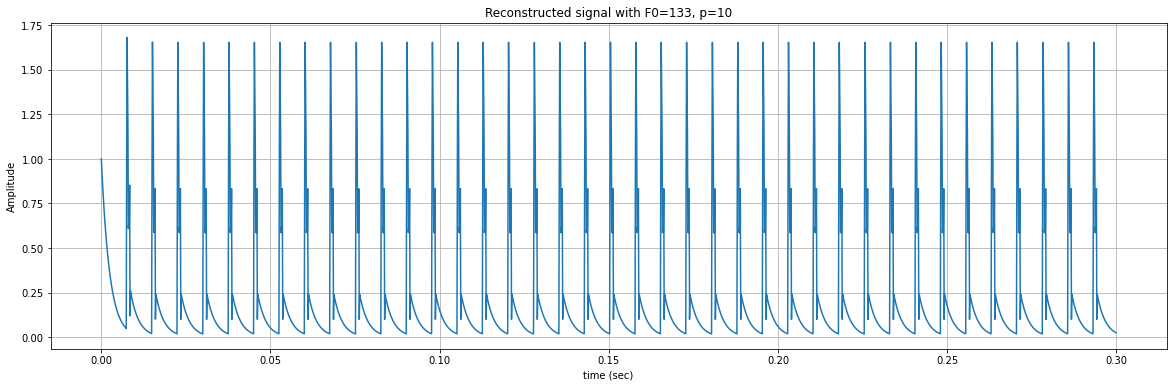

In [113]:
# Output with 10th order filter and G
a_10 = LP_cofficients[4]
G_10 = np.sqrt(Errors[10])


E_x_n = np.sqrt(np.sum(x_n**2))
u_n = x_n
s_hat = np.zeros(u_n.shape)
for n in range(u_n.shape[0]):
  s_hat[n] = u_n[n]
  for k in range(1,a_10.shape[0]):
    if (n-k>0):
      s_hat[n] += a_10[k-1]*u_n[n-k]


# De-emphasis:
 
s_hat_d = np.zeros(s_hat.shape)
s_hat_d[0] = s_hat[0]
for i in range(1,s_hat.shape[0]): 
  s_hat_d[i] = s_hat[i]+0.95*s_hat_d[i-1]

# View the waveform:
n = np.arange(s_hat.shape[0])/Fs
plt.plot(n, s_hat_d)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Reconstructed signal with F0={}, p={}'.format(F0,10))

In [114]:
scaled = np.int16(s_hat_d/s_hat.max() * 32767)
IPython.display.Audio(scaled,rate=8000)

### Ideal Impulse Train of F0=120

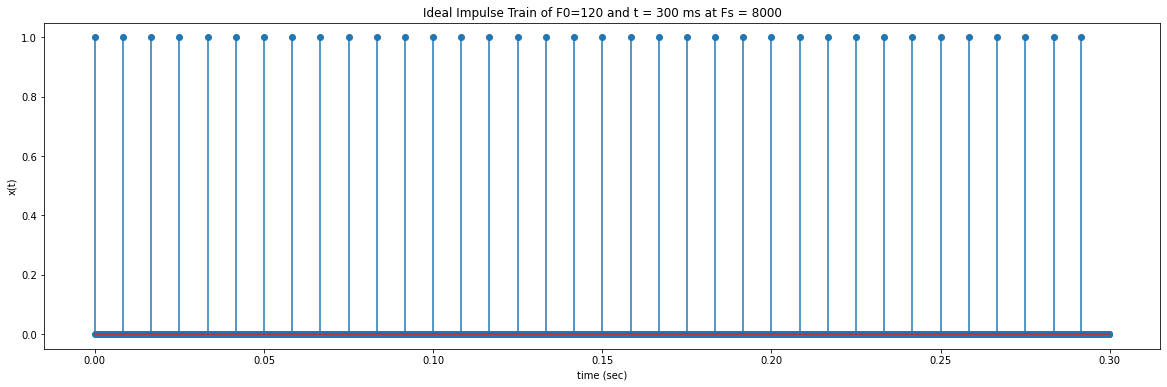

In [115]:

def I_train(Fs, F0, delta_t, sec):
  x_n = np.zeros(int(sec*Fs))
  st,N = stride(F0,Fs,delta_t)
  i=0
  while(i+N < x_n.shape[0]):
    x_n[i:i+N] = st
    i+=N
  if(i<x_n.shape[0]):
     x_n[i:] = st[:x_n.shape[0]-i]
  
  return x_n


from fractions import Fraction
def stride(F0, Fs, delta_t):
  T0 = 1/F0
  Ts = 1/Fs
  N = Fraction(Fs,F0).numerator
  st = np.zeros(N)
  n = np.arange(0,N)
  t = Ts * n
  k=0
  for i in t:
    c= i//T0
    j = i-c*T0
    if( j< delta_t/2):
      st[k] =1
    elif(j > (T0-delta_t/2)):
      st[k] = 1
    k = k+ 1
  return st, N

# x[n] 

F0 = 120
Fs = 8000
# Finding the samples x[n] for 0.3 sec
x_n = np.zeros(int(0.3*Fs))
# delta_t = 1/Fs
x_n = I_train(Fs, F0, 1/Fs, 0.3)

n = np.arange(0,x_n.shape[0])

# Plotting x[n]:
plot_x = n/Fs
plot_y = x_n
plt.stem(plot_x,plot_y)
plt.xlabel('time (sec)')
plt.ylabel('x(t)')
plt.title('Ideal Impulse Train of F0={} and t = {} ms at Fs = {}'.format(F0,300,Fs))
plt.show()

### Applying 10th order filter

Text(0.5, 1.0, 'Reconstructed signal with F0=120, p=10')

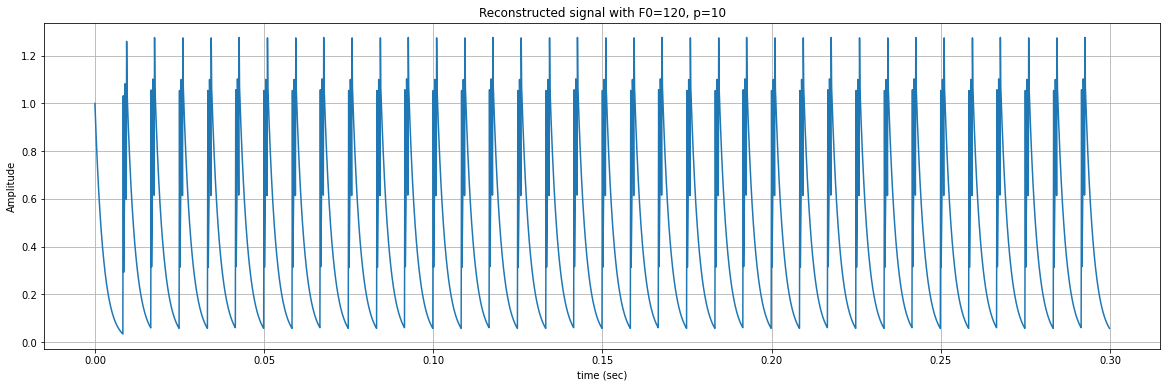

In [116]:
# Output with 10th order filter and G
a_10 = LP_cofficients[4]
G_10 = np.sqrt(Errors[10])
u_n = x_n
s_hat = np.zeros(u_n.shape)
E_x_n = np.sqrt(np.sum(x_n**2))

for n in range(u_n.shape[0]):
  s_hat[n] = u_n[n]
  for k in range(1,a_10.shape[0]):
    if (n-k>0):
      s_hat[n] -= a_10[k-1]*u_n[n-k]

# De-emphasis Difference Equation: 
s_hat_d = np.zeros(s_hat.shape)
s_hat_d[0] = s_hat[0]
for i in range(1,s_hat.shape[0]): 
  s_hat_d[i] = s_hat[i]+0.95*s_hat_d[i-1]

# View the waveform:
n = np.arange(s_hat.shape[0])/Fs
plt.plot(n, s_hat_d)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Reconstructed signal with F0={}, p={}'.format(F0,10))

In [117]:
scaled = np.int16(s_hat_d/s_hat.max() * 32767)
IPython.display.Audio(scaled,rate=8000)

### Applying 8th order filter

Text(0.5, 1.0, 'Reconstructed signal with F0=120, p=8')

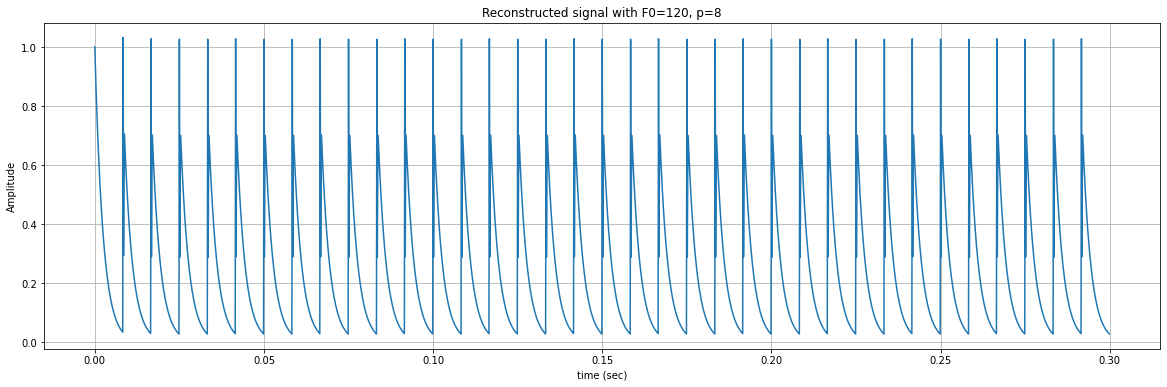

In [118]:
# Output with 10th order filter and G
a_8 = LP_cofficients[1]
G_8 = np.sqrt(Errors[4])
u_n = x_n
s_hat = np.zeros(u_n.shape)
E_x_n = np.sqrt(np.sum(x_n**2))
for n in range(u_n.shape[0]):
  s_hat[n] = u_n[n]
  for k in range(1,a_8.shape[0]):
    if (n-k>0):
      s_hat[n] -= a_8[k-1]*u_n[n-k]

# De-emphasis Difference Equation: 
s_hat_d = np.zeros(s_hat.shape)
s_hat_d[0] = s_hat[0]
for i in range(1,s_hat.shape[0]): 
  s_hat_d[i] = s_hat[i]+0.95*s_hat_d[i-1]

n = np.arange(s_hat.shape[0])/Fs
plt.plot(n, s_hat_d)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Reconstructed signal with F0={}, p={}'.format(F0,8))

In [119]:
scaled = np.int16(s_hat_d/s_hat.max() * 32767)
IPython.display.Audio(scaled,rate=8000)

### LP analysis on the provided /s/ sound

In [120]:
sr,x_n = read('ss.wav')
IPython.display.Audio("ss.wav")

In [121]:
y_n = np.zeros(x_n.shape)
y_n[0] = x_n[0]
for i in range(1,x_n.shape[0]): 
    y_n[i] = x_n[i]-0.95*x_n[i-1]

Text(0.5, 1.0, 'Magnitude spectrum corresponding to hamming window of size 5 ms')

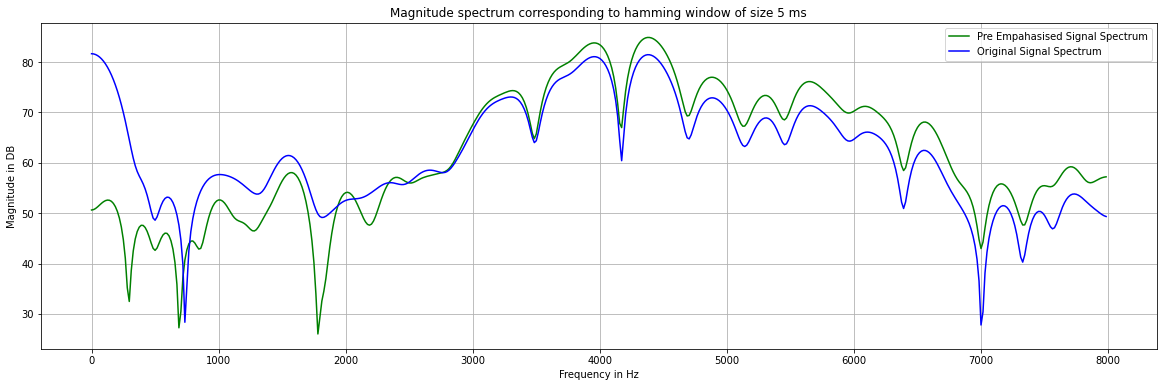

In [122]:
window_size = 0.005
Fs = sr
window_len = int(window_size*Fs)
window= np.hamming(window_len)
center = y_n.shape[0]//2 
V_n_y = y_n[center:center+window.shape[0]]* window
V_n_x = x_n[center:center+window.shape[0]]* window
dft_length = 1024
V_k_y = np.fft.fft(V_n_y, n=dft_length)
V_k_x = np.fft.fft(V_n_x, n=dft_length)
freq = np.fft.fftfreq(V_k_y.shape[-1], 1/Fs)
zerro = dft_length//2
mag_vk_y = 20*np.log10(np.abs(V_k_y))
mag_vk_x = 20*np.log10(np.abs(V_k_x))
plt.plot(freq[0:zerro],mag_vk_y[0:zerro],'g-',label = 'Pre Empahasised Signal Spectrum')
plt.plot(freq[0:zerro],mag_vk_x[0:zerro],'b-',label = 'Original Signal Spectrum')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = 12,6
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude spectrum corresponding to hamming window of size 5 ms')

Text(0.5, 1.0, 'Magnitude spectrum (Db) corresponding to Hamming window of size 30 ms')

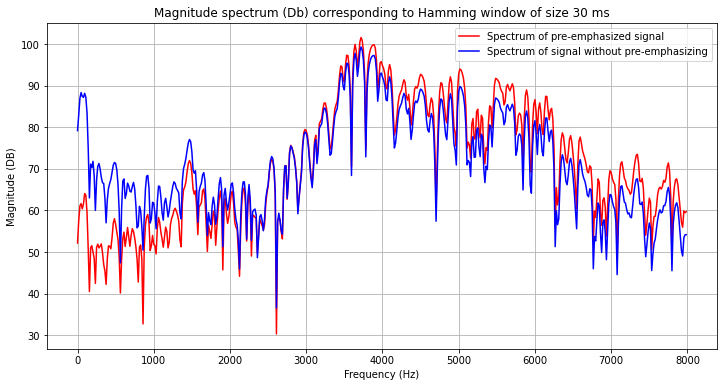

In [123]:
window_size = 0.03
Fs = sr
window_len = int(window_size*Fs)
window= np.hamming(window_len)
center = y_n.shape[0]//2 
V_n_y = y_n[center:center+window.shape[0]]* window
V_n_x = x_n[center:center+window.shape[0]]* window

dft_length = 1024

V_k_y = np.fft.fft(V_n_y, n=dft_length)
V_k_x = np.fft.fft(V_n_x, n=dft_length)

freq = np.fft.fftfreq(V_k_y.shape[-1], 1/Fs)

zero = dft_length//2
mag_vk_y = 20*np.log10(np.abs(V_k_y))
mag_vk_x = 20*np.log10(np.abs(V_k_x))
plt.plot(freq[0:zero],mag_vk_y[0:zero],'r',label = 'Spectrum of pre-emphasized signal')
plt.plot(freq[0:zero],mag_vk_x[0:zero],'b',label = 'Spectrum of signal without pre-emphasizing')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = 20,6
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (DB)')

plt.title('Magnitude spectrum (Db) corresponding to Hamming window of size 30 ms')

AutoCorrelation Cofficients
 For order P=2: 
 [-0.0710214  -0.87302556]
 For order P=4: 
 [-0.75316634 -1.63163334 -0.74944024 -0.80925953]
 For order P=6: 
 [-0.9751412  -2.19326185 -1.50874644 -1.74715351 -0.58440185 -0.45710465]
 For order P=8: 
 [-0.90373788 -2.13131288 -1.28343544 -1.62876216 -0.35531346 -0.44631397
  0.08480321 -0.05878532]
 For order P=10: 
 [-0.89460507 -2.1368729  -1.23703265 -1.64569158 -0.28798905 -0.53377083
  0.08117818 -0.22094722 -0.03278768 -0.10021255]


Error for 2th order is: 126202858.28912094
Error for 4th order is: 36391591.42048118
Error for 6th order is: 27903261.6709555
Error for 8th order is: 27274146.45467289
Error for 10th order is: 26911161.49656749


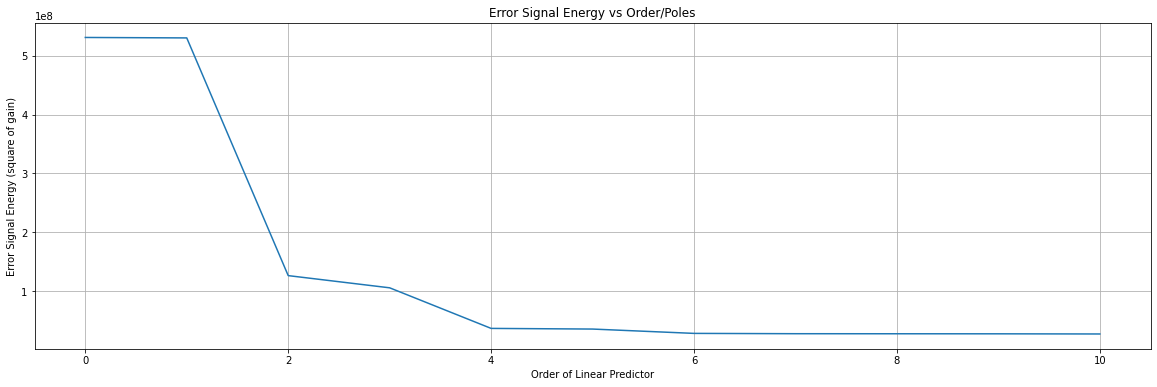

In [124]:
# Orders p
P = np.array([2,4,6,8,10])
# Errors
Errors = []
LP_cofficients = []
r = autocorrelation(V_n_y)
for p in P:
  # Error E
  E = np.zeros(p)
  # LP Coefficients a and a[i-1] as a_1
  a = np.zeros(p)
  a_1 = np.zeros(p)
  E[0] = r[0]
  # Reflection Coefficient k:
  k = r[1]/E[0]
  a[0] = k
  if p==P[-1]:
    Errors.append(E[0])
  for i in range(1,p):
    a_1 = a.copy()
    # Update error
    E[i] = (1-np.square(k))*E[i-1]
    
    # Update Reflection Coefficient
    k=0
    for j in range(i):
      k += a_1[j]*r[i-j]
    k = (r[i+1]- k)/ E[i]

    # Update Coefficients
    a[i] = k
    for j in range(i):
      a[j] = a_1[j] - k*a_1[i-j-1]
    # Append the errors:
    if (p==P[-1]):
      Errors.append(E[i])

  # Append coefficients and Errors
  LP_cofficients.append(a)
  if (p==P[-1]):
      Errors.append((1-np.square(k))*E[i])
  
# Print Coefficient:
print('AutoCorrelation Cofficients')
for i in range(P.shape[0]):
  print(' For order P={}: \n {}'.format(P[i],LP_cofficients[i]))

plt.plot(np.arange(0,P[-1]+1,1), Errors)
plt.xlabel('Order of Linear Predictor')
plt.ylabel('Error Signal Energy (square of gain)')
plt.title('Error Signal Energy vs Order/Poles')
plt.rcParams["figure.figsize"] = 10,6
plt.grid()

print('\n')

for p in P:
  print('Error for {}th order is: {}'.format(p,Errors[p]))

we can clearly see that error is decreasing as the order P increases. However there isn't any significant improvement in error energy after a certain value of P (4-6 in this case).

Poles of Order 6 [-0.54350561+0.71923087j -0.54350561-0.71923087j  0.11532073+0.94935458j
  0.11532073-0.94935458j -0.05938572+0.78196443j -0.05938572-0.78196443j]
Zeroes of Order 6 []
Poles of Order 10 [ 0.49936556+0.34555011j  0.49936556-0.34555011j  0.12396012+0.95788903j
  0.12396012-0.95788903j -0.06536559+0.8331876j  -0.06536559-0.8331876j
 -0.54280461+0.59104013j -0.54280461-0.59104013j -0.46245802+0.65858674j
 -0.46245802-0.65858674j]
Zeroes of Order 10 []


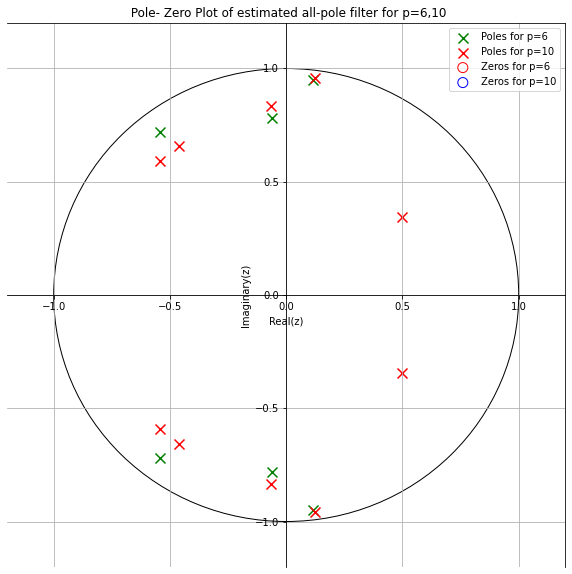

In [125]:
# For p=6
a_6 = LP_cofficients[2]
# For p=10
a_10 = LP_cofficients[4]

# tf2zpk: Gives zeros, poles and gain
Num_coef = 1
Den_coef = np.ones(a_6.shape[0]+1)
Den_coef[1:] = -a_6
zeros_6, poles_6, k_6 = tf2zpk(Num_coef, Den_coef)
print('Poles of Order 6',poles_6)
print('Zeroes of Order 6',zeros_6)
Den_coef = np.ones(a_10.shape[0]+1)
Den_coef[1:] = -a_10
zeros_10, poles_10, k_10 = tf2zpk(Num_coef, Den_coef)
print('Poles of Order 10',poles_10)
print('Zeroes of Order 10',zeros_10)
# Plot Pole zero
# Plot Unit Circle:
circle = plt.Circle((0,0),1,fill = False)
ax= plt.gca()
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.2, 1.2))
ax.add_patch(circle)
# Add Poles:
x = np.real(poles_6)
y = np.imag(poles_6)
plt.scatter(x,y,marker = 'x', color = 'g',s = 100, label = 'Poles for p=6')

x = np.real(poles_10)
y = np.imag(poles_10)
plt.scatter(x,y,marker = 'x', color = 'r',s = 100, label = 'Poles for p=10')
# Add Zeros:
x = np.real(zeros_6)
y = np.imag(zeros_6)
plt.scatter(x,y,marker= 'o',facecolors='none', edgecolors = 'r', s= 100, label = 'Zeros for p=6')

x = np.real(zeros_10)
y = np.imag(zeros_10)
plt.scatter(x,y,marker= 'o',facecolors='none', edgecolors = 'b', s= 100, label = 'Zeros for p=10')
# Add Axis
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.rcParams["figure.figsize"] = 6,6
plt.xlabel('Real(z)')
plt.ylabel('Imaginary(z)')
plt.title(' Pole- Zero Plot of estimated all-pole filter for p=6,10')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
plt.legend()

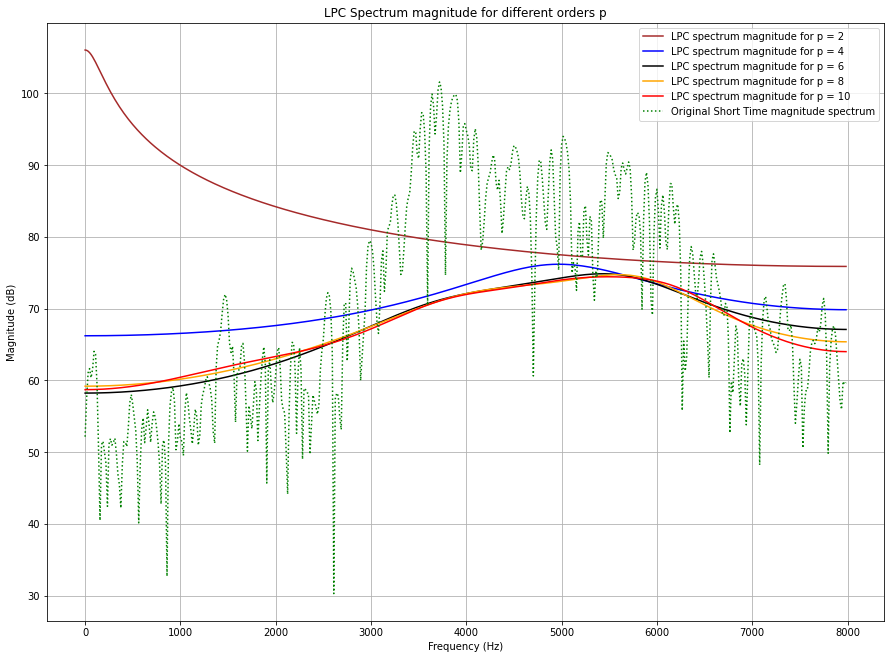

In [126]:
colors = {2: 'brown', 4: 'blue', 6: 'black', 8: 'orange', 10: 'red'}
index_E = np.zeros(6,int)
index_E[:5] = np.arange(2,11,2)
index_E[5] = P[-1]
Errors = np.array(Errors)
G = np.sqrt(Errors[index_E])
f = freq[0:zerro]
w = 2*np.pi*f/Fs
mag_orig = mag_vk_y[0:zerro]
z = np.exp(-1j*w)
magnitude_db_P = []
for i in range(P.shape[0]):
  poles = LP_cofficients[i]
  Den = 1
  for j in range(len(poles)):
    Den += poles[j]*z**j
  magnitude_db = 20*np.log10(np.abs(G[i]/Den))
  magnitude_db_P.append(magnitude_db)
  plt.plot(f,magnitude_db,colors[P[i]],label = 'LPC spectrum magnitude for p = {}'.format(P[i]))

plt.plot(f,mag_orig,'g:',label='Original Short Time magnitude spectrum' )
plt.legend()
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.title('LPC Spectrum magnitude for different orders p')
fig = plt.gcf()
fig.set_size_inches(15, 11)
plt.grid('on')

We can see that the error is high in this case as compared to /aa/ sound